# Read me:
Though we have removed the use to getting key from environment and hardcoded our key in the code. incase our code fails due to it please if you could run the below commands:

#instructions to install the dotenv, open the terminal and write the below command

pip install python-dotenv

In this project we are getting all our data from alpha advantage api.
This code is interactive and you could input two stock symbols of any company and get data however we have made suggestions for Pepsi(pep) and coco cola( KO), with its symbols in the output screen as well, because we wanted to compare the trends of sister companies.
Please note in the entire code below 
filedataframe1 is the stock inputted first
filedataframe2 is the stock inputted next.  
In our case currently Coco Cola is first input and then Pepsi
we have first cleaned the data to fit in the dataframe, then we get the size and timelines of the stock data,
further we did time series analysis of both stocks independently and combined.
we tried to analyze knn model of one firm and then both of them together
Lastly, we plotted moving averages for both the companies


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 24 18:00:51 2019

@author: takan
"""

# -*- coding: utf-8 -*-
"""
Created on Mon Apr 15 13:36:12 2019

@author: takan
"""

from dotenv import load_dotenv
import os
import pandas as pd
import requests
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
%matplotlib inline
from statistics import *
import seaborn as sns

#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier,\
                             partial_dependence

from sklearn import tree

from sklearn.metrics import roc_curve, auc, average_precision_score, confusion_matrix,\
                            precision_score, f1_score, recall_score, accuracy_score, roc_auc_score, precision_recall_curve, classification_report





"""
To get the key for API:
"""

In [2]:

#print(os.environ.get("key")) 
load_dotenv()
#print(os.environ.get("key"))
key ='WXH9MKX7862JR9IS'
key = os.environ.get("key")


For doing the calculations of the stock
this function takes symbol parameter 
and the cleaned dataframe which we generate from function data_cleaning_processing

In [3]:

def calculations(sign,file):
    print("Stock:",sign)
    print("Run at Date:", datetime.date(datetime.now())," and at time:" , datetime.time(datetime.now()))
    #path = str(os.getcwd())+ '\\'+str(sign)+'.csv'
    #file=pd.read_csv(path)
    print("DATA related to price queries:")
    print( "Dimension of the dataset",file.shape,"for stock:",sign)
    
    file.rename(columns={'"timestamp':'timestamp','volume"':'volume'},inplace=True)
    
    todayclose = file['close'].loc[file['timestamp']== max(file['timestamp'])]
    high =  max(file['high'])
    low = min(file['low'])
    print('Latest Date of Available Trading Data:',max(file['timestamp']))
    print('Oldest Date of Available Trading Data:',min(file['timestamp']))
    print('Latest Close Price from the available Trading Data:','$'+str(float(todayclose.values)))
    print('Highest Price from the available Trading Data:','$'+str(float(high)))
    print('Lowest Price from the available Trading Data:','$'+str(float(low)))
    #todayclose = file['4. close'].loc[file['date']== max(file['date'])]
    todaylow = file['low'].loc[file['timestamp']== max(file['timestamp'])]
    todayhigh = file['high'].loc[file['timestamp']== max(file['timestamp'])]
    #print(todayclose.values)
    remove_files(sign)
    return file
    

"""""" Regression function to run linear regression """""""

In [4]:
def regression(file,file1):
    print(file1)
    correlations =file.corr()
    print(correlations)
    print(file)
    file.timestamp = pd.to_datetime(file.timestamp)
    file.volume = file.volume.astype(int)
    print(file.dtypes)
    
    sns.heatmap(correlations, xticklabels =correlations, yticklabels =correlations)
    
    

"""
Using API function to get the best match for a symbol given
""" 

In [5]:
def search_symbol_json(keyword,key):
   # 'function to search a symbol using a keyword'
    base_url = 'https://www.alphavantage.co/query?'
    key=str(key)
    #print(base_url)
    #print(key)
    url = "https://www.alphavantage.co/query?"+"function=SYMBOL_SEARCH&keywords="
   
    url2 = url +keyword
   
    url3="&apikey="

    url4=url2+url3+key
   
    response = requests.get(url4).json()
    #sym,name=[],[]
    sym,name,sec_type,region,curr=[],[],[],[],[]
    for element in response['bestMatches']:
        sym.append(element['1. symbol'])
        name.append(element['2. name'])
        sec_type.append(element['3. type'])
        region.append(element['4. region'])
        curr.append(element['8. currency'])
    search_matches = pd.DataFrame({'symbol':sym,'name':name,'type':sec_type,'region':region,'currency':curr})
    return print(search_matches)

"""
def data_cleaning_processing takes the correct symbol and downloads
the file from url, cleans it and then makes it a dataframe which can be 
easily processed by calculations function
"""

In [6]:
def data_cleaning_processing(corr_sign):
    
    path = str(os.getcwd())+ '//'+str(corr_sign)+'.csv'
    data=pd.read_csv(path,skiprows=1,sep="\,",engine='python')
    #print(path)
    #print(data)
    data['"timestamp']=data['"timestamp'].str.replace('\"','')
    data['volume"']=data['volume"'].str.replace('\"','')
    pd.to_datetime(data['"timestamp'])
    pd.to_numeric(data['volume"'])
    FinalTable=pd.DataFrame(data)
    #print(corr_sign,FinalTable)
    calculations(corr_sign,FinalTable)
    return FinalTable

"""
Function to remove files
"""

In [7]:
def remove_files(symbol):
    files = os.listdir(os.getcwd())
    removefile = symbol+'.csv'
    for f in files:
        if removefile in f:
          x=  removefile
          os.remove(x)
          return print("The file is removed:",x)

"""
Main body which takes input from user or suggests best matches
currently the limit is 5 which can be changed
"""

Suggestion for stock symbol KO (Coca Cola) or Pep (Pepsi)
Incase not sure of company stock symbol just type the company name for suggestions
Please type the symbol of the stock to be checked:Ko
Ko
Stock: Ko
Run at Date: 2019-05-14  and at time: 17:46:56.409502
DATA related to price queries:
Dimension of the dataset (5375, 6) for stock: Ko
Latest Date of Available Trading Data: 2019-05-14
Oldest Date of Available Trading Data: 1998-01-02
Latest Close Price from the available Trading Data: $48.69
Highest Price from the available Trading Data: $88.94
Lowest Price from the available Trading Data: $35.58
The file is removed: Ko.csv
Please type the symbol of the stock to be checked:pep
Ko
Stock: Ko
Run at Date: 2019-05-14  and at time: 17:47:12.729800
DATA related to price queries:
Dimension of the dataset (5375, 6) for stock: Ko
Latest Date of Available Trading Data: 2019-05-14
Oldest Date of Available Trading Data: 1998-01-02
Latest Close Price from the available Trading Data: $127.41
High

dtype: object
I CAME HERE


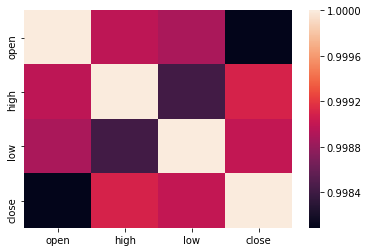

In [8]:
load_dotenv()
#print(os.environ.get("key"))
key ='WXH9MKX7862JR9IS'
key = os.environ.get("key")
key ='WXH9MKX7862JR9IS'
print("Suggestion for stock symbol KO (Coca Cola) or Pep (Pepsi)")
print("Incase not sure of company stock symbol just type the company name for suggestions")
listto_symbol=[]
list_len_check=0
filedataframe1=pd.DataFrame
filedataframe2=pd.DataFrame
i=0
while i<2:
         Question = input("Please type the symbol of the stock to be checked:") 

         sign=Question


         request_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&"+"symbol="+sign+"&apikey="+key+"&outputsize=full&datatype=csv"
         response = requests.get(request_url)
         rawdata= pd.DataFrame(response.text.splitlines())
         error = "Invalid API call"
         check = error in str(rawdata.head(3))
         if check == True :
            print("Incorrect symbol please look at table below")
            search_symbol_json(sign,key)
            continue
         else:
            #symbol = Question
            listto_symbol.append(Question)
            for symbol in listto_symbol:
    
    
                 list_len_check=list_len_check+1
                 if list_len_check ==1 :
                     filename = './'+symbol+'.csv'
                     #print(filename)
                     file1 = rawdata.to_csv(filename,sep=',',index_label =False ,index=False)
                     print(symbol)
                     filedataframe1= data_cleaning_processing(symbol)
   
        
                 else:
                    filename = './'+symbol+'.csv'
                    #print(filename)
                    file1 = rawdata.to_csv(filename,sep=',',index_label =False ,index=False)
                    ##print(list_len_check)
                    #print("second")
                    print(symbol)
                    #print(file1)
                    filedataframe2= data_cleaning_processing(symbol)
         i=i+1

    
regression(filedataframe1,filedataframe2)
        
    

       timestamp    open      high       low   close    volume
0     2019-05-14  127.56  128.5100  127.2850  127.41   3371190
1     2019-05-13  127.02  127.9400  126.6300  127.16   4297104
2     2019-05-10  126.14  128.2800  125.6200  128.01   3720445
3     2019-05-09  125.77  126.5400  124.8500  126.05   3127153
4     2019-05-08  125.80  126.7400  124.9500  126.02   3844711
5     2019-05-07  126.64  126.9500  125.1800  125.98   3558887
6     2019-05-06  127.30  127.6253  126.7600  127.27   2883946
7     2019-05-03  127.10  128.1800  126.9200  127.67   2854949
8     2019-05-02  127.24  127.5500  126.1700  126.83   2875936
9     2019-05-01  127.85  128.0000  127.0100  127.24   3810811
10    2019-04-30  127.05  128.3900  126.3400  128.05   4963611
11    2019-04-29  126.14  126.9600  126.0200  126.69   2793384
12    2019-04-26  126.52  127.2450  126.1150  126.40   3033876
13    2019-04-25  125.65  126.3999  125.1800  126.13   4433718
14    2019-04-24  127.41  127.9800  126.6700  126.92   

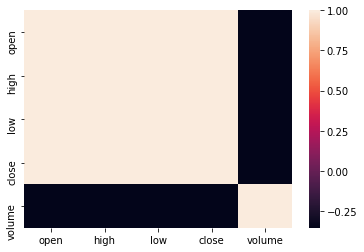

In [9]:
regression(filedataframe1,filedataframe2)

In [10]:
filedataframe1

,timestamp,open,high,low,close,volume
0,2019-05-14,48.53,49.3200,48.350,48.69,13917774
1,2019-05-13,47.91,48.1300,47.730,48.05,11911503
2,2019-05-10,47.41,48.2950,47.400,48.19,9653803
3,2019-05-09,47.80,47.9800,47.070,47.40,11450532
4,2019-05-08,48.05,48.2300,47.820,47.85,9281542
5,2019-05-07,48.23,48.2900,47.770,48.00,12487481
6,2019-05-06,48.33,48.6100,48.260,48.47,8658209
7,2019-05-03,48.60,48.9600,48.520,48.72,7076949
8,2019-05-02,48.53,48.7657,48.270,48.39,8724932
9,2019-05-01,48.95,49.0750,48.550,48.59,10551594


In [11]:
filedataframe2

,timestamp,open,high,low,close,volume
0,2019-05-14,127.56,128.5100,127.2850,127.41,3371190
1,2019-05-13,127.02,127.9400,126.6300,127.16,4297104
2,2019-05-10,126.14,128.2800,125.6200,128.01,3720445
3,2019-05-09,125.77,126.5400,124.8500,126.05,3127153
4,2019-05-08,125.80,126.7400,124.9500,126.02,3844711
5,2019-05-07,126.64,126.9500,125.1800,125.98,3558887
6,2019-05-06,127.30,127.6253,126.7600,127.27,2883946
7,2019-05-03,127.10,128.1800,126.9200,127.67,2854949
8,2019-05-02,127.24,127.5500,126.1700,126.83,2875936
9,2019-05-01,127.85,128.0000,127.0100,127.24,3810811


In [12]:
filedataframe1['timestamp'].unique()

array(['2019-05-14T00:00:00.000000000', '2019-05-13T00:00:00.000000000',
       '2019-05-10T00:00:00.000000000', ...,
       '1998-01-06T00:00:00.000000000', '1998-01-05T00:00:00.000000000',
       '1998-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [13]:
filedataframe1.dtypes

timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: object

In [14]:
filedataframe1 = filedataframe1.set_index('timestamp')

In [15]:
filedataframe2 = filedataframe2.set_index('timestamp')

In [16]:
filedataframe2.dtypes

open      float64
high      float64
low       float64
close     float64
volume     object
dtype: object

In [17]:
filedataframe2

,open,high,low,close,volume
timestamp,,,,,
2019-05-14,127.56,128.5100,127.2850,127.41,3371190
2019-05-13,127.02,127.9400,126.6300,127.16,4297104
2019-05-10,126.14,128.2800,125.6200,128.01,3720445
2019-05-09,125.77,126.5400,124.8500,126.05,3127153
2019-05-08,125.80,126.7400,124.9500,126.02,3844711
2019-05-07,126.64,126.9500,125.1800,125.98,3558887
2019-05-06,127.30,127.6253,126.7600,127.27,2883946
2019-05-03,127.10,128.1800,126.9200,127.67,2854949
2019-05-02,127.24,127.5500,126.1700,126.83,2875936


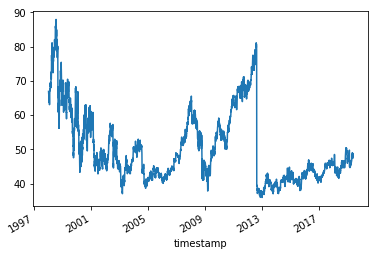

In [18]:
filedataframe1['close'].plot()

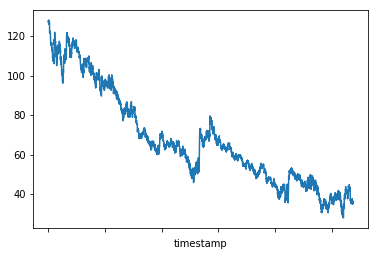

In [19]:
filedataframe2['close'].plot()

In [20]:
filedataframe2 = filedataframe2.reset_index('timestamp')

In [21]:
filedataframe2

,timestamp,open,high,low,close,volume
0,2019-05-14,127.56,128.5100,127.2850,127.41,3371190
1,2019-05-13,127.02,127.9400,126.6300,127.16,4297104
2,2019-05-10,126.14,128.2800,125.6200,128.01,3720445
3,2019-05-09,125.77,126.5400,124.8500,126.05,3127153
4,2019-05-08,125.80,126.7400,124.9500,126.02,3844711
5,2019-05-07,126.64,126.9500,125.1800,125.98,3558887
6,2019-05-06,127.30,127.6253,126.7600,127.27,2883946
7,2019-05-03,127.10,128.1800,126.9200,127.67,2854949
8,2019-05-02,127.24,127.5500,126.1700,126.83,2875936
9,2019-05-01,127.85,128.0000,127.0100,127.24,3810811


In [22]:
filedataframe1 = filedataframe1.reset_index('timestamp')

In [23]:
filedataframe2['timestamp'] = pd.to_datetime(filedataframe2['timestamp'])

In [24]:
filedataframe1['timestamp'] = pd.to_datetime(filedataframe1['timestamp'])

In [25]:
combined_df = pd.merge(filedataframe1, filedataframe2, on='timestamp')

In [26]:
combined_df.rename(columns={'timestamp':'timestamp', 'open_x':'firm1_open', 'high_x':'firm1_high', 'low_x':'firm1_low', 'close_x':'firm1_close', 'volume_x':'firm1_volume',
       'open_y':'firm2_open', 'high_y':'firm2_high', 'low_y':'firm2_low', 'close_y':'firm2_close', 'volume_y':'firm2_volume'}, 
                 inplace=True)

In [27]:
combined_df = combined_df.set_index('timestamp')

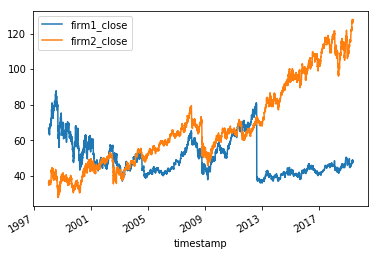

In [28]:
combined_df[['firm1_close' , 'firm2_close']].plot(kind='line')

If we take it for two firms like Pepsi and Coca cola, we could observe that there is a sudden drop in stock prices of Coca Cola due to splitting of stocks of Coca Cola in the year 2013 in the ratio 1:2 which made them make their quantities higher but overall reducing the prices of each stock. Also in the broader sense, we can see that both these sister companies follow the same pattern of trend. And they are moving in sync. 

KNN MODEL FOR ONE FIRM

In [29]:
X1 = combined_df[['firm2_open', 'firm2_high', 'firm2_low',
       'firm2_volume']]
y1 = combined_df['firm2_close']

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.3)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=25)
neigh.fit(Xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=25, p=2,
          weights='uniform')

In [32]:
accuracy_score = neigh.score(Xtest,ytest)
print("The model has an accuracy of ->", accuracy_score)

The model has an accuracy of -> -0.013351247407127564


In [33]:
cross_val_score_avg = cross_val_score(neigh ,X1,y1,cv=5).mean()
print("\nThe model has a cross val score of ->", cross_val_score_avg)


The model has a cross val score of -> -19.2539692568562


The accuracy of the model is extremely low as firm2_close values is only being dependent on the values of firm2. Below we can see that the accuracy of the model rises when we consider the values of firm1 also.

KNN MODEL ON COMBINED DATAFRAME

In [34]:
X1 = combined_df[['firm1_open', 'firm1_high', 'firm1_low', 'firm1_close',
       'firm1_volume', 'firm2_open', 'firm2_high', 'firm2_low',
       'firm2_volume']]
y1 = combined_df['firm2_close']

In [35]:
#train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.3)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=25)
neigh.fit(Xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=25, p=2,
          weights='uniform')

In [37]:
accuracy_score = neigh.score(Xtest,ytest)
print("The model has an accuracy of ->", accuracy_score)


The model has an accuracy of -> 0.6026220218415935


In [38]:
cross_val_score_avg = cross_val_score(neigh ,X1,y1,cv=5).mean()
print("\nThe model has a cross val score of ->", cross_val_score_avg)



The model has a cross val score of -> -8.128708499632726


Here we are trying to predict the closing price of firm1 based on all the trading factors of firm1 and firm2. In this case what happens is that we have two stock options coca cola and pepsi and based on that we are getting a good accuracy just because they are sister companies. If we take two firms randomly the observation is that it is very difficult to predict the closing price if they are not related or are not sister companies.

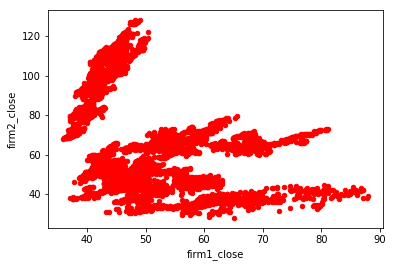

In [39]:
ax1 = combined_df.plot(kind='scatter', x='firm1_close', y='firm2_close', color='r')

In [40]:
reg1 = smf.ols('firm2_close ~ firm2_open + firm1_open + firm1_close + firm1_volume',
               data=combined_df).fit()
reg1.params

Intercept       1.757117e-01
firm2_open      9.994445e-01
firm1_open     -5.141930e-01
firm1_close     5.122874e-01
firm1_volume   -1.428394e-09
dtype: float64

In [41]:
print(smf.ols('firm2_close ~ firm2_open + firm1_open + firm1_close + firm1_volume',data=combined_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            firm2_close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.178e+06
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:47:16   Log-Likelihood:                -4905.9
No. Observations:                5375   AIC:                             9822.
Df Residuals:                    5370   BIC:                             9855.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1757      0.060      2.943   

We could see from the analysis that R-squared of this model is very high which is 0.999 which might be due to  the reason that firm2_close value is dependent on firm2_open value (of course) and also it depends on the different parameters of firm1 which indicates that both these firms behave in a similar patttern.

Also, from above we can see that the correlation coefficient of firm1_close is quite high in relation to firm2_close which also indicates that these two firms have similar behaviour

In [42]:
filedataframe2[['open','high']].head()

,open,high
0,127.56,128.51
1,127.02,127.94
2,126.14,128.28
3,125.77,126.54
4,125.80,126.74


Moving Average of 100 stocks have been calculated continuously and have been plotted for both the firms below in order to see better prediction:

In [43]:
filedataframe2['100ma'] = filedataframe2['close'].rolling(window=100,min_periods=0).mean()

In [44]:
filedataframe2

,timestamp,open,high,low,close,volume,100ma
0,2019-05-14,127.56,128.5100,127.2850,127.41,3371190,127.410000
1,2019-05-13,127.02,127.9400,126.6300,127.16,4297104,127.285000
2,2019-05-10,126.14,128.2800,125.6200,128.01,3720445,127.526667
3,2019-05-09,125.77,126.5400,124.8500,126.05,3127153,127.157500
4,2019-05-08,125.80,126.7400,124.9500,126.02,3844711,126.930000
5,2019-05-07,126.64,126.9500,125.1800,125.98,3558887,126.771667
6,2019-05-06,127.30,127.6253,126.7600,127.27,2883946,126.842857
7,2019-05-03,127.10,128.1800,126.9200,127.67,2854949,126.946250
8,2019-05-02,127.24,127.5500,126.1700,126.83,2875936,126.933333
9,2019-05-01,127.85,128.0000,127.0100,127.24,3810811,126.964000


In [45]:
filedataframe1['100ma'] = filedataframe1['close'].rolling(window=100,min_periods=0).mean()

In [46]:
filedataframe1

,timestamp,open,high,low,close,volume,100ma
0,2019-05-14,48.53,49.3200,48.350,48.69,13917774,48.690000
1,2019-05-13,47.91,48.1300,47.730,48.05,11911503,48.370000
2,2019-05-10,47.41,48.2950,47.400,48.19,9653803,48.310000
3,2019-05-09,47.80,47.9800,47.070,47.40,11450532,48.082500
4,2019-05-08,48.05,48.2300,47.820,47.85,9281542,48.036000
5,2019-05-07,48.23,48.2900,47.770,48.00,12487481,48.030000
6,2019-05-06,48.33,48.6100,48.260,48.47,8658209,48.092857
7,2019-05-03,48.60,48.9600,48.520,48.72,7076949,48.171250
8,2019-05-02,48.53,48.7657,48.270,48.39,8724932,48.195556
9,2019-05-01,48.95,49.0750,48.550,48.59,10551594,48.235000


In [47]:
filedataframe2 = filedataframe2.set_index('timestamp')

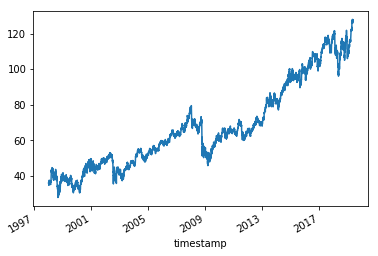

In [48]:
filedataframe2['close'].plot()

In [49]:
filedataframe1 = filedataframe1.set_index('timestamp')

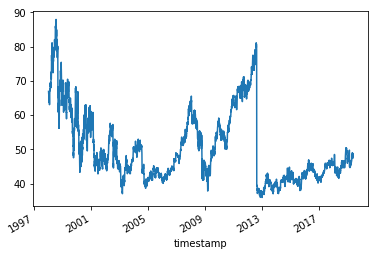

In [50]:
filedataframe1['close'].plot()

In [51]:
filedataframe1 = filedataframe1.reset_index('timestamp')

In [52]:
filedataframe2 = filedataframe2.reset_index('timestamp')

In [53]:
filedataframe2.tail()

,timestamp,open,high,low,close,volume,100ma
5370,1998-01-08,35.88,36.31,35.81,35.88,2920700,39.2202
5371,1998-01-07,34.94,35.88,34.81,35.88,2971000,39.1671
5372,1998-01-06,36.50,36.63,35.00,35.19,4391300,39.1040
5373,1998-01-05,35.88,36.81,35.63,36.50,3769900,39.0609
5374,1998-01-02,36.31,36.31,35.56,36.00,2588900,39.0165


In [54]:
filedataframe1.tail()

,timestamp,open,high,low,close,volume,100ma
5370,1998-01-08,65.81,67.00,65.75,66.63,3161900,72.6394
5371,1998-01-07,65.81,66.19,65.13,66.19,2678600,72.5050
5372,1998-01-06,65.88,66.63,65.81,66.13,2724100,72.3713
5373,1998-01-05,66.81,66.88,65.25,66.44,3845800,72.2519
5374,1998-01-02,66.75,67.00,65.94,66.94,2721600,72.1319
